# DGT-TM, DGT-Translation Memory
> European Commission's Directorate-General for Translation multilingual Translation Memory

- toc: false
- badges: false
- comments: false
- author: Morgan McGuire
- categories: [DGT-TM, DGT-TM3, translation, nmt, mt]

### Available for Download  ✅
⚠️ Always check the license of the data source before using the data ⚠️
- Link: [https://ec.europa.eu/jrc/en/language-technologies/dgt-translation-memory](https://ec.europa.eu/jrc/en/language-technologies/dgt-translation-memory)
- Format: **.tmx**
- NOTE:
    - There are **no Irish translations** in:
       - DGT-TM Version 1 (Released in 2007) 
       - DGT-TM-release 2011 
    - "DGT-TM-release 2012" is the first release with Irish translations

### Brief Description

A parallel multilingual corpus of the European Union’s legislative documents (Acquis Communautaire) in 24 EU languages. The aligned translation units have been provided by the Directorate-General for Translation of the European Commission by extraction from one of its large shared translation memories in EURAMIS (European advanced multilingual information system). This memory contains most, although not all, of the documents which make up the Acquis Communautaire, as well as some other documents which are not part of the Acquis.

### Other Notes

See the section on the EU site called "How to produce bilingual extractions" for a java-based alternative to extracting the TMX files

- Lines of text: 190,500
- GA Word count: 4,852,515

### Word Count Distribution

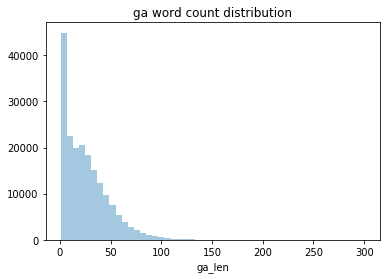

In [12]:
#hide_input
sns.distplot(ga_df.ga_len, kde=False)
plt.title('ga word count distribution');

### Code to Extract TMX to DataFrame

Pip install the `tmx2dataframe` package [here](https://github.com/jaderabbit/tmx2dataframe)

> `pip install tmx2dataframe`

### Extract from a single TMX file

In [3]:
from pathlib import Path
import pandas as pd
from tmx2dataframe import tmx2dataframe

metadata, df = tmx2dataframe.read('Volume_1/22003D0033.tmx')
df.head()

,source_language,source_sentence,target_language,target_sentence
0,EN-GB,Decision of the EEA Joint Committee No 33/2003...,ET-01,"EMP Ühiskomitee otsus nr 33/2003, 14. märts 20..."
1,EN-GB,"THE EEA JOINT COMMITTEE,",ET-01,"EMP ÜHISKOMITEE,"
2,EN-GB,Having regard to the Agreement on the European...,ET-01,võttes arvesse Euroopa Majanduspiirkonna lepin...
3,EN-GB,HAS DECIDED AS FOLLOWS:,ET-01,ON VASTU VÕTNUD JÄRGMISE OTSUSE:
4,EN-GB,Article 1,ET-01,Artikkel 1


In [66]:
df.source_sentence[0], df.target_sentence[0]

('Decision of the EEA Joint Committee No 33/2003 of 14 March 2003 amending Annex XIII (Transport) to the EEA Agreement',
 'EMP Ühiskomitee otsus nr 33/2003, 14. märts 2003, millega muudetakse EMP lepingu XIII lisa (transport)')

In [67]:
len(df), len(df.target_sentence[1].split())

(35, 2)

The metadata is also included:

In [43]:
metadata

{'creationtool': 'tmexport2 2.32 27-03-2007',
 'adminlang': 'EN-US',
 'srclang': 'EN-GB'}

### Extract language-specific sentences from multiple volumes and TMX files:

In [3]:
#hide 
from pathlib import Path
import gc
import pandas as pd
from tmx2dataframe import tmx2dataframe
from fastprogress.fastprogress import master_bar, progress_bar
import seaborn as sns
import matplotlib.pyplot as plt 

In [8]:
lang='GA'
#yr='2013'

yr_list=[]
for y in range(2,10):
    yr_list.append(f'201{y}')

# For each release year
for yr in yr_list:
    dir_path = Path(f'{yr}_release') 

    dir_list=[]
    for dd in dir_path.iterdir():
        if dd.is_dir(): dir_list.append(dd)

    mb = master_bar(dir_list)
    # For directory in a specific release year
    for d in mb: 
        if d.is_dir() & (d.suffix != '.zip'):
            # For each file in a specific directory
            for f in progress_bar(list(d.iterdir()), parent=mb): 
                if f.suffix == '.tmx': 
                    try:
                        _, df = tmx2dataframe.read(str(f))
                        # If target_language in dataframe contains the language string (like 'GA')
                        if len(df[df.target_language.str.contains(lang)]) > 0:
                            tmp = df[df.target_language.str.contains(lang)].copy()
                            tmp['filepath'] = str(f)
                            var_exists = 'ga_df' in locals() or 'ga_df' in globals()
                            if var_exists: ga_df = pd.concat([ga_df, tmp])
                            else: ga_df = tmp
                    except:
                        print(f"Couldn't open {f} in {d}") 
    print(f'{yr} DONE!')
    var_exists = 'ga_df' in locals() or 'ga_df' in globals()
    if var_exists:
        print(f'{len(ga_df)} samples found in {yr} release')
        ga_df.reset_index(inplace=True, drop=True)
        ga_df.to_csv(f'dgt_tm_{yr}_release_en-ga.csv')
        del ga_df
        gc.collect()
    else: print(f'No {lang} text found in {yr} release')
    print()
    #ga_df.head()

2012 DONE!
2848 samples found in 2012 release



2013 DONE!
No GA text found in 2013 release



2014 DONE!
41461 samples found in 2014 release



2015 DONE!
7673 samples found in 2015 release



2016 DONE!
9127 samples found in 2016 release



2017 DONE!
37181 samples found in 2017 release



2018 DONE!
30014 samples found in 2018 release



2019 DONE!
53652 samples found in 2019 release



#### Compile all release years

In [17]:
for y in range(2,10):
    try:
        if y == 2: ga_df = pd.read_csv(f'dgt_tm_201{y}_release_en-ga.csv', index_col=0)
        tmp = pd.read_csv(f'dgt_tm_201{y}_release_en-ga.csv', index_col=0)
        ga_df = pd.concat([ga_df, tmp])
    except:
        print(f'Error with opening dgt_tm_201{y}_release_en-ga.csv')

ga_df.reset_index(inplace=True, drop=True)
print(len(ga_df))
ga_df.to_csv('dgt_tm_2012-2019_releases_en-ga.csv', index=False)
ga_df.head()

190500


,source_language,source_sentence,target_language,target_sentence,filepath
0,EN-GB,Regulation (EU) No 1174/2011 of the European P...,GA-IE,Rialachán (AE) Uimh. 1174/2011 ó Pharlaimint n...,2012_release/Vol_2011_4/32011R1174.tmx
1,EN-GB,of 16 November 2011,GA-IE,an 16 Samhain 2011,2012_release/Vol_2011_4/32011R1174.tmx
2,EN-GB,on enforcement measures to correct excessive m...,GA-IE,maidir le bearta forfheidhmiúcháin chun míchot...,2012_release/Vol_2011_4/32011R1174.tmx
3,EN-GB,THE EUROPEAN PARLIAMENT AND THE COUNCIL OF THE...,GA-IE,TÁ PARLAIMINT NA hEORPA AGUS COMHAIRLE AN AONT...,2012_release/Vol_2011_4/32011R1174.tmx
4,EN-GB,Having regard to the Treaty on the Functioning...,GA-IE,Ag féachaint don Chonradh ar Fheidhmiú an Aont...,2012_release/Vol_2011_4/32011R1174.tmx


### Other Files
#### file_list.txt

The .zip files also contain a .txt file with the original filename and what languages it is available in:

In [49]:
df_ls = pd.read_csv('Volume_1/file_list.txt', header=None)
df_ls.columns = ['fst']
df_ls.head()

,fst
0,21970A0720(01).tmx EN:54 BG:34 CS:35 ET:44 FR...
1,21970A1123(01).tmx EN:631 BG:569 ET:547 FR:55...
2,21972A0722(03).tmx EN:4674 BG:1436 HU:1629 LT...
3,21972A0722(04).tmx EN:29 BG:16 FR:9 HU:28 MT:...
4,21972A0722(05).tmx EN:251 BG:214 FR:219


In [50]:
df_ls.fst[0]

'21970A0720(01).tmx EN:54  BG:34 CS:35 ET:44 FR:41 HU:39 LV:41 MT:42 PL:40 SK:35 SL:41 '